# Visual Automata

[![Latest Version](https://img.shields.io/pypi/v/visual-automata.svg)](https://pypi.python.org/pypi/visual-automata/)
[![Supported Python versions](https://img.shields.io/pypi/pyversions/visual-automata.svg)](https://pypi.python.org/pypi/visual-automata/)
[![Downloads](https://pepy.tech/badge/visual-automata)](https://pepy.tech/project/visual-automata)

Copyright 2021 [Lewi Lie Uberg](https://uberg.me/)\
_Released under the MIT license_

Visual Automata is a Python 3 library built as a wrapper for the [Automata](https://github.com/caleb531/automata) library to add more visualization features.

## Contents

- [Visual Automata](#visual-automata)
  - [Contents](#contents)
  - [Prerequisites](#prerequisites)
  - [Installing](#installing)
  - [Finite Automaton (FA)](#finite-automaton-fa)
    - [VisualDFA](#visualdfa)
      - [Importing](#importing)
      - [Instantiating DFAs](#instantiating-dfas)
      - [Converting](#converting)
      - [Minimal-DFA](#minimal-dfa)
      - [Transition Table](#transition-table)
      - [Check input strings](#check-input-strings)
      - [Show Diagram](#show-diagram)
    - [VisualNFA](#visualnfa)
      - [Importing](#importing-1)
      - [Instantiating NFAs](#instantiating-nfas)
      - [Converting](#converting-1)
      - [Transition Table](#transition-table-1)
      - [Eliminate lambda/epsilon](#eliminate-lambdaepsilon)
      - [Check input strings](#check-input-strings-1)
      - [Show Diagram](#show-diagram-1)
  - [Authors](#authors)
  - [License](#license)
  - [Acknowledgments](#acknowledgments)

## Prerequisites

[`pip install automata-lib`](https://github.com/caleb531/automata)\
[`pip install pandas`](https://github.com/pandas-dev/pandas)\
[`pip install graphviz`](https://github.com/xflr6/graphviz)\
[`pip install colormath`](https://github.com/gtaylor/python-colormath)\
[`pip install jupyterlab`](https://github.com/jupyterlab/jupyterlab)

## Installing

[`pip install visual-automata`](https://pypi.org/project/visual-automata/)



## Finite Automaton (FA)

### VisualDFA

#### Importing

Import needed classes.

In [1]:
from automata.fa.dfa import DFA

from visual_automata.fa.dfa import VisualDFA

#### Instantiating DFAs

Define an visual_automata DFA that can accept any string ending with 00 or 11.

In [2]:
dfa = VisualDFA(
    states={"q0", "q1", "q2", "q3", "q4"},
    input_symbols={"0", "1"},
    transitions={
        "q0": {"0": "q3", "1": "q1"},
        "q1": {"0": "q3", "1": "q2"},
        "q2": {"0": "q3", "1": "q2"},
        "q3": {"0": "q4", "1": "q1"},
        "q4": {"0": "q4", "1": "q1"},
    },
    initial_state="q0",
    final_states={"q2", "q4"},
)

#### Converting

An automata-lib DFA can be converted to a VisualDFA.

Define an automata-lib DFA that can accept any string ending with 00 or 11.

In [3]:
dfa = DFA(
    states={"q0", "q1", "q2", "q3", "q4"},
    input_symbols={"0", "1"},
    transitions={
        "q0": {"0": "q3", "1": "q1"},
        "q1": {"0": "q3", "1": "q2"},
        "q2": {"0": "q3", "1": "q2"},
        "q3": {"0": "q4", "1": "q1"},
        "q4": {"0": "q4", "1": "q1"},
    },
    initial_state="q0",
    final_states={"q2", "q4"},
)

Convert automata-lib DFA to VisualDFA.

In [4]:
dfa = VisualDFA(dfa)

#### Transition Table

Outputs the transition table for the given DFA.

In [10]:
dfa.table

,0,1
→q0,q3,q1
q1,q3,*q2
*q2,q3,*q2
q3,*q4,q1
*q4,*q4,q1


```text
       0    1
→q0   q3   q1
q1    q3  *q2
*q2   q3  *q2
q3   *q4   q1
*q4  *q4   q1
```

#### Minimal-DFA

Creates a minimal DFA which accepts the same inputs as the old one. Unreachable states are removed and equivalent states are merged. States are renamed by default.

In [5]:
new_dfa = VisualDFA(
    states={'q0', 'q1', 'q2'},
    input_symbols={'0', '1'},
    transitions={
        'q0': {'0': 'q0', '1': 'q1'},
        'q1': {'0': 'q0', '1': 'q2'},
        'q2': {'0': 'q2', '1': 'q1'}
    },
    initial_state='q0',
    final_states={'q1'}
)

In [6]:
new_dfa.table

,0,1
→q0,q0,*q1
*q1,q0,q2
q2,q2,*q1


```text
      0    1
→q0  q0  *q1
*q1  q0   q2
q2   q2  *q1
```

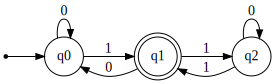

In [7]:
new_dfa.show_diagram()

![alt text](https://github.com/lewiuberg/visual-automata/blob/master/images/new_dfa.png?raw=true "new_dfa")

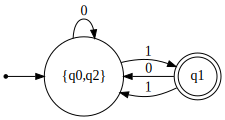

In [8]:
minimal_dfa = VisualDFA.minify(new_dfa)
minimal_dfa.show_diagram()

![alt text](https://github.com/lewiuberg/visual-automata/blob/master/images/minimal_dfa.png?raw=true "minimal_dfa")

In [9]:
minimal_dfa.table

,0,1
"→{q0,q2}","{q0,q2}",*q1
*q1,"{q0,q2}","{q0,q2}"


```text
                0        1
→{q0,q2}  {q0,q2}      *q1
*q1       {q0,q2}  {q0,q2}
```

#### Check input strings

`1001` does not end with `00` or `11`, and is therefore `Rejected`

In [11]:
dfa.input_check("1001")

[Rejected]                         
Step: Current state: Input symbol: New state:
1                →q0             1         q1
2                 q1             0         q3
3                 q3             0        *q4
4                *q4             1         q1

```text
          [Rejected]                         
Step: Current state: Input symbol: New state:
1                →q0             1         q1
2                 q1             0         q3
3                 q3             0        *q4
4                *q4             1         q1
```

`10011` does end with `11`, and is therefore `Accepted`

In [12]:
dfa.input_check("10011")

[Accepted]                         
Step: Current state: Input symbol: New state:
1                →q0             1         q1
2                 q1             0         q3
3                 q3             0        *q4
4                *q4             1         q1
5                 q1             1        *q2

```text
          [Accepted]                         
Step: Current state: Input symbol: New state:
1                →q0             1         q1
2                 q1             0         q3
3                 q3             0        *q4
4                *q4             1         q1
5                 q1             1        *q2
```

#### Show Diagram

For IPython `dfa.show_diagram()` may be used.\
For a python script `dfa.show_diagram(view=True)` may be used to automatically view the graph as a PDF file.

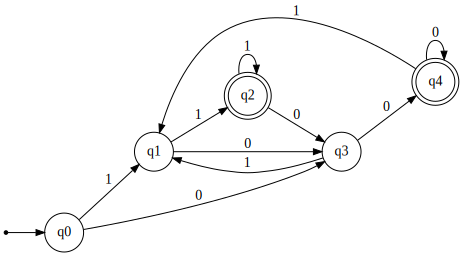

In [13]:
dfa.show_diagram()

![alt text](https://github.com/lewiuberg/visual-automata/blob/master/images/dfa.png?raw=true "dfa")

The `show_diagram` method also accepts input strings, and will return a graph with gradient `red` arrows for `Rejected` results, and gradient `green` arrows for `Accepted` results. It will also display a table with transitions states stepwise. The steps in this table will correspond with the `[number]` over each traversed arrow.

Please note that for visual purposes additional arrows are added if a transition is traversed more than once.

[Rejected]                         
Step: Current state: Input symbol: New state:
1                →q0             1         q1
2                 q1             0         q3
3                 q3             0        *q4
4                *q4             1         q1

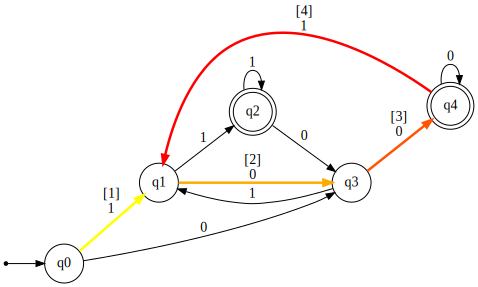

In [14]:
dfa.show_diagram("1001")

```text
          [Rejected]                         
Step: Current state: Input symbol: New state:
1                →q0             1         q1
2                 q1             0         q3
3                 q3             0        *q4
4                *q4             1         q1
```

![alt text](https://github.com/lewiuberg/visual-automata/blob/master/images/dfa_1001.png?raw=true "dfa_1001")

[Accepted]                         
Step: Current state: Input symbol: New state:
1                →q0             1         q1
2                 q1             0         q3
3                 q3             0        *q4
4                *q4             1         q1
5                 q1             1        *q2

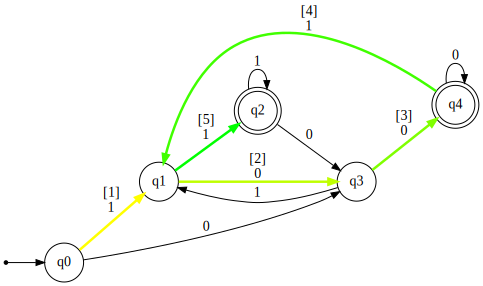

In [15]:
dfa.show_diagram("10011")

```text
          [Accepted]                         
Step: Current state: Input symbol: New state:
1                →q0             1         q1
2                 q1             0         q3
3                 q3             0        *q4
4                *q4             1         q1
5                 q1             1        *q2
```

![alt text](https://github.com/lewiuberg/visual-automata/blob/master/images/dfa_10011.png?raw=true "dfa_10011")

### VisualNFA

#### Importing

Import needed classes.

In [2]:
from automata.fa.nfa import NFA

from visual_automata.fa.nfa import VisualNFA

#### Instantiating NFAs

Define an visual_automata NFA that can accept any string with the pattern 10, 1010, 101010.

In [3]:
nfa = VisualNFA(
    states={"q0", "q1", "q2"},
    input_symbols={"0", "1"},
    transitions={
        "q0": {"": {"q2"}, "1": {"q1"}},
        "q1": {"1": {"q2"}, "0": {"q0", "q2"}},
        "q2": {},
    },
    initial_state="q0",
    final_states={"q0"},
)

#### Converting

An automata-lib NFA can be converted to a VisualNFA.

Define an automata-lib NFA that can accept any string with the pattern 10, 1010, 101010.

In [4]:
nfa = NFA(
    states={"q0", "q1", "q2"},
    input_symbols={"0", "1"},
    transitions={
        "q0": {"": {"q2"}, "1": {"q1"}},
        "q1": {"1": {"q2"}, "0": {"q0", "q2"}},
        "q2": {},
    },
    initial_state="q0",
    final_states={"q0"},
)

Convert automata-lib NFA to VisualNFA.

In [5]:
nfa = VisualNFA(nfa)

#### Transition Table

Outputs the transition table for the given DFA.

In [15]:
nfa.table

,0,1,λ
→*q0,∅,q1,q2
q1,"{*q0,q2}",q2,∅
q2,∅,∅,∅


```text
             0   1   λ
→*q0         ∅  q1  q2
q1    {*q0,q2}  q2   ∅
q2           ∅   ∅   ∅
```

#### Eliminate lambda/epsilon

Creates a NFA with lambda transitions removed.

In [6]:
nfa_eliminated = VisualNFA.eliminate_lambda(nfa)

In [9]:
nfa_eliminated.table

,0,1
→*q0,∅,q1
q1,"{*q0,q2}",q2
q2,∅,∅


```text
             0   1
→*q0         ∅  q1
q1    {*q0,q2}  q2
q2           ∅   ∅
```

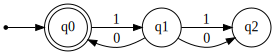

In [12]:
nfa_eliminated.show_diagram()

![alt text](https://github.com/lewiuberg/visual-automata/blob/master/images/eliminated_nfa.png?raw=true "eliminated_nfa")

#### Check input strings

`101` does not correspond with the pattern `10`, `1010`, `101010`, and is therefore `Rejected`

In [19]:
nfa.input_check("101")

[Rejected]                         
Step: Current state: Input symbol: New state:
1               →*q0             1         q1
2                 q1             0         q2
3                 q2             1          ∅

```text
          [Rejected]                         
Step: Current state: Input symbol: New state:
1               →*q0             1         q1
2                 q1             0         q2
3                 q2             1          ∅
```
`1010` does correspond with the pattern `10`, `1010`, `101010`, and is therefore `Accepted`

In [22]:
nfa.input_check("1010")

[Accepted]                         
Step: Current state: Input symbol: New state:
1               →*q0             1         q1
2                 q1             0       →*q0
3               →*q0             1         q1
4                 q1             0       →*q0

```text
          [Accepted]                         
Step: Current state: Input symbol: New state:
1               →*q0             1         q1
2                 q1             0       →*q0
3               →*q0             1         q1
4                 q1             0       →*q0
```

#### Show Diagram

For IPython `nfa.show_diagram()` may be used.\
For a python script `nfa.show_diagram(view=True)` may be used to automatically view the graph as a PDF file.

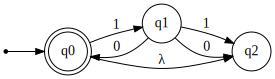

In [25]:
nfa.show_diagram()

![alt text](https://github.com/lewiuberg/visual-automata/blob/master/images/nfa.png?raw=true "nfa")

The `show_diagram` method also accepts input strings, and will return a graph with gradient `red` arrows for `Rejected` results, and gradient `green` arrows for `Accepted` results. It will also display a table with transitions states stepwise. The steps in this table will correspond with the `[number]` over each traversed arrow.

Please note that for visual purposes additional arrows are added if a transition is traversed more than once.

[Rejected]                         
Step: Current state: Input symbol: New state:
1               →*q0             1         q1
2                 q1             0         q2
3                 q2             1          ∅

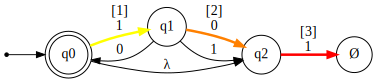

In [27]:
nfa.show_diagram("101")

```text
          [Rejected]                         
Step: Current state: Input symbol: New state:
1               →*q0             1         q1
2                 q1             0         q2
3                 q2             1          ∅
```

![alt text](https://github.com/lewiuberg/visual-automata/blob/master/images/nfa_101.png?raw=true "nfa_101")

[Accepted]                         
Step: Current state: Input symbol: New state:
1               →*q0             1         q1
2                 q1             0       →*q0
3               →*q0             1         q1
4                 q1             0       →*q0

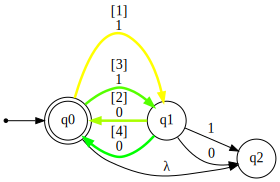

In [32]:
nfa.show_diagram("1010")

```text
          [Accepted]                         
Step: Current state: Input symbol: New state:
1               →*q0             1         q1
2                 q1             0       →*q0
3               →*q0             1         q1
4                 q1             0       →*q0
```

![alt text](https://github.com/lewiuberg/visual-automata/blob/master/images/nfa_1010.png?raw=true "nfa_1010")

Please note that for long input strings, the path calculations may take some time.

In [36]:
big_nfa = VisualNFA(
    states={"q1", "q2", "q3", "q4", "q5", "q6", "q7", "q8"},
    input_symbols={"A", "C", "G", "T"},
    transitions={
        "q1": {"A": {"q7"}, "C": {"q4"}, "G": {"q4", "q2"}, "T": {"q4"}},
        "q2": {"A": {"q3", "q6"}, "C": {"q2", "q4"}, "G": {"q3", "q6"}, "T": {"q6"}},
        "q3": {"A": {"q8"}, "C": {"q8"}, "T": {"q8"}},
        "q4": {"A": {"q5"}, "C": {"q4"}, "G": {"q5"}, "T": {"q2", "q4", "q5"}},
        "q5": {"A": {"q3", "q8"}, "C": {"q3", "q8"}, "G": {"q8"}, "T": {"q3", "q8"}},
        "q6": {"A": {"q8"}, "C": {"q8"}, "G": {"q8"}, "T": {"q8"}},
        "q7": {"A": {"q7", "q8"}, "C": {"q7", "q8"}, "G": {"q8"}, "T": {"q3", "q8"}},
        "q8": {},
    },
    initial_state="q1",
    final_states={"q8"},
)

In [37]:
big_nfa.table

,A,C,G,T
→q1,q7,q4,"{q2,q4}",q4
q2,"{q3,q6}","{q2,q4}","{q3,q6}",q6
q3,*q8,*q8,∅,*q8
q4,q5,q4,q5,"{q2,q4,q5}"
q5,"{q3,*q8}","{q3,*q8}",*q8,"{q3,*q8}"
q6,*q8,*q8,*q8,*q8
q7,"{q7,*q8}","{q7,*q8}",*q8,"{q3,*q8}"
*q8,∅,∅,∅,∅


[Accepted]                         
Step: Current state: Input symbol: New state:
1                →q1             C         q4
2                 q4             G         q5
3                 q5             C        *q8

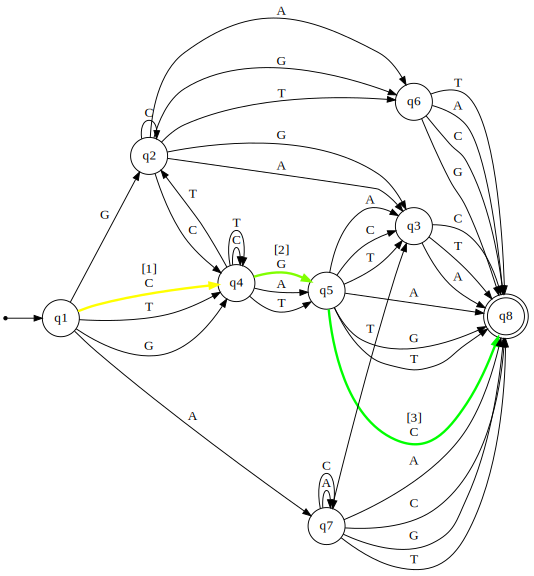

In [42]:
big_nfa.show_diagram("CGC")

```text
          [Accepted]                         
Step: Current state: Input symbol: New state:
1                →q1             C         q4
2                 q4             G         q5
3                 q5             C        *q8
```

![alt text](https://github.com/lewiuberg/visual-automata/blob/master/images/big_nfa.png?raw=true "big_nfa")

## Authors

- **[Lewi Lie Uberg](https://github.com/lewiuberg)** - [uberg.me](https://uberg.me/)

## License

This project is licensed under the MIT License - see the [LICENSE.md](https://github.com/lewiuberg/visual-automata/blob/master/LICENSE.txt) file for details

## Acknowledgments

- [Caleb Evans](https://github.com/caleb531) for his work on automata-lib.
- [Geir Arne Hjelle](https://github.com/gahjelle), [Michal Porteš](https://github.com/mportesdev), and [Bart Willems](https://github.com/bart-r-willems) for their general counsel.
- [Dr. Seifedine Kadry](https://www.noroff.no/en/contact/staff/53-academic/423-seifedine-kadry). My _Further Discrete Mathematics_ professor at **Noroff University College**, for teaching me Automata.
- [JFLAP](http://www.jflap.org) for their work on a GUI based Automata application.